In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 42.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.29MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.11MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.91MB/s]


In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 4 * 4, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

model = LeNet5()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
def train(model, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(trainloader):.4f}")

In [6]:
def test(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [7]:
train(model)
test(model)

Epoch 1, Loss: 0.2644
Epoch 2, Loss: 0.0782
Epoch 3, Loss: 0.0543
Epoch 4, Loss: 0.0420
Epoch 5, Loss: 0.0333
Test Accuracy: 98.65%


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def display_predictions(model, dataloader, num_images=6):
    model.eval()
    images_shown = 0

    plt.figure(figsize=(12, 6))

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break

                plt.subplot(2, num_images//2, images_shown + 1)
                plt.imshow(images[i].squeeze().numpy(), cmap='gray')
                plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
                plt.axis('off')
                images_shown += 1

            if images_shown >= num_images:
                break
    plt.tight_layout()
    plt.show()

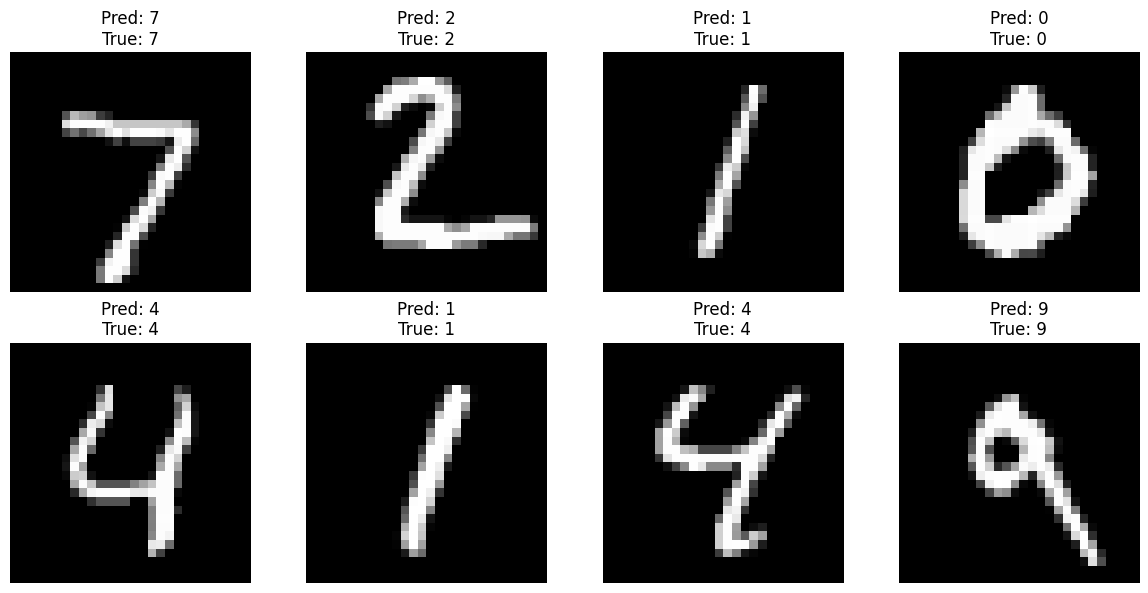

In [10]:
display_predictions(model, testloader, num_images=8)